# An E-Commerce company wants to find the factors influence the sales of the mobile Phone.

# Use your EDA techniques and statistical hypothesis techniques and find the factors which influences the sales of the mobile phones.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats as stm

In [3]:
df=pd.read_csv("D:\PGCP-DSML RITHEESH V\Statistics\STDS-Assignment 3\ECommerce _company_mobile sales.csv")
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [21]:
df.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

### The data doesn't have duplicate values or null values , we can proceed to EDA 

In [6]:
df.groupby('brand')['sales_price'].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Apple,56.0,57748.107143,13822.588532,32999.0,46749.0,59649.0,69149.0,79149.0
Poco,56.0,15936.500000,5829.441342,7999.0,11499.0,14999.0,18999.0,30999.0
Realme,138.0,17105.521739,7824.113079,6499.0,10499.0,15749.0,20149.0,41999.0
Samsung,119.0,28823.537815,30779.712737,7990.0,12499.0,16499.0,27499.0,157999.0
Xiaomi,61.0,16711.311475,9106.864029,5742.0,10990.0,13400.0,21999.0,54999.0


<AxesSubplot:xlabel='sales_price', ylabel='Count'>

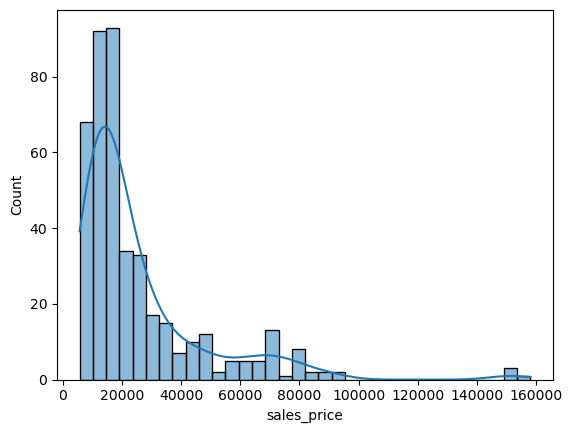

In [7]:
sns.histplot(x='sales_price',data=df,kde=True)

The sales data is right skewed 
The price range of mobile phones selling the most is between 

In [8]:
df.sales.value_counts()

23.07    9
25.76    9
5.15     6
5.90     6
1.76     6
        ..
0.15     1
1.74     1
0.11     1
0.28     1
1.53     1
Name: sales, Length: 216, dtype: int64

In [9]:
df.model.value_counts()

iPhone XR            18
iPhone 12            17
iPhone 12 Mini       16
GT Master Edition     9
X3                    9
                     ..
Galaxy A7             1
Galaxy Fold 2         1
Galaxy M11            1
6i                    1
Redmi 5               1
Name: model, Length: 119, dtype: int64

In [10]:
df.display_size.value_counts()

6.5    164
6.4     64
6.7     62
6.1     43
6.3     22
5.4     16
6.6     14
6.2     12
5.8      6
5.5      6
6.0      5
7.6      4
4.7      4
5.7      3
6.9      2
5.2      2
5.6      1
Name: display_size, dtype: int64

<AxesSubplot:xlabel='battery_capacity', ylabel='Count'>

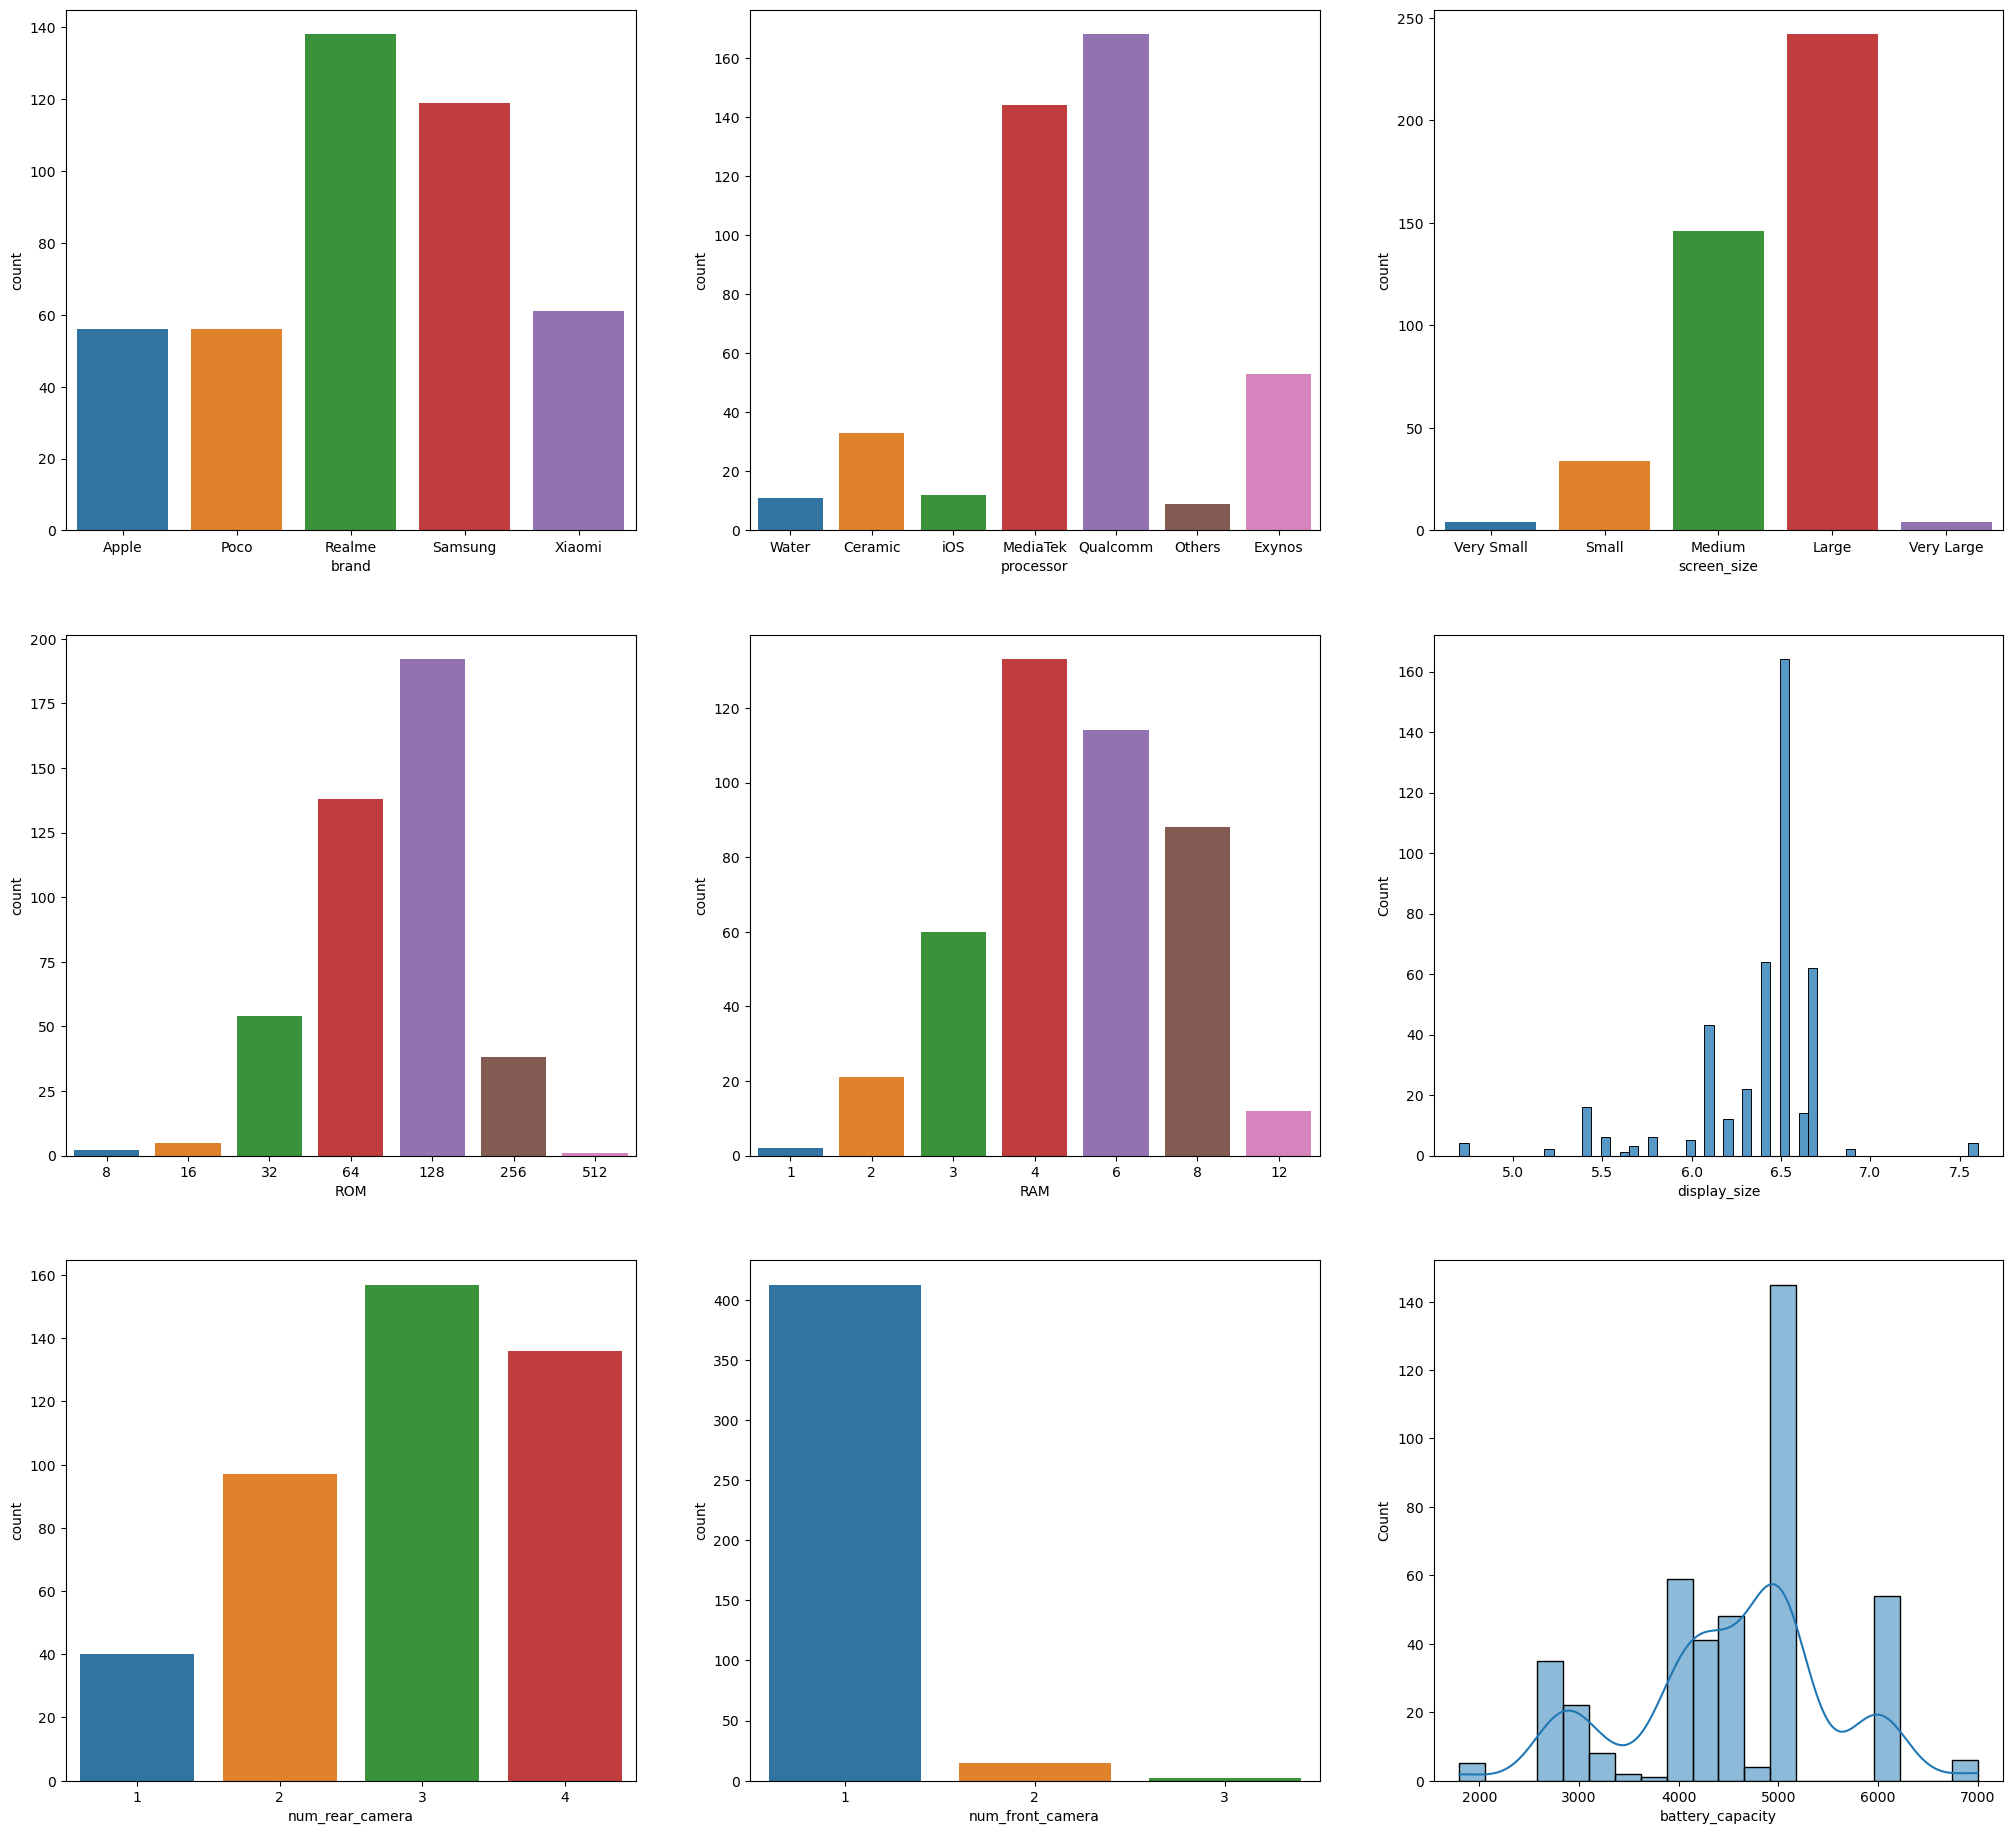

In [11]:
plt.figure(figsize=(25,23))
plt.subplot(3,3,1)
sns.countplot(x='brand',data=df)
plt.subplot(3,3,2)
sns.countplot(x='processor',data=df)
plt.subplot(3,3,3)
sns.countplot(x='screen_size',data=df)
plt.subplot(3,3,4)
sns.countplot(x='ROM',data=df)
plt.subplot(3,3,5)
sns.countplot(x='RAM',data=df)
plt.subplot(3,3,6)
sns.histplot(df.display_size)
plt.subplot(3,3,7)
sns.countplot(x='num_rear_camera',data=df)
plt.subplot(3,3,8)
sns.countplot(x='num_front_camera',data=df)
plt.subplot(3,3,9)
sns.histplot(x='battery_capacity',data=df,kde=True)


### Inference

#### Does brand value affect the sales of the mobile phones? verify the claim at 5% level of significance

In [23]:
a=df[df.brand=='Apple']['sales']
p=df[df.brand=='Poco']['sales']
r=df[df.brand=='Realme']['sales']
s=df[df.brand=='Samsung']['sales']
x=df[df.brand=='Xiaomi']['sales']

In [28]:
#test for normality
st.shapiro(a)

ShapiroResult(statistic=0.560131847858429, pvalue=1.067541541277528e-11)

since p value<alpha(0.05)

we conclude that the brand value is not following normal

we can proceed for kruskar wallis test

In [31]:
#variance test
st.levene(a,p,r,s,x)

LeveneResult(statistic=8.749610107837015, pvalue=8.543508526010748e-07)

since p value<alpha(0.05)

hence we conclude that variance of the brand are not same

H0:population median sales of all brand is same
    
H1:population median sales of any two brand is different 

In [32]:
st.kruskal(a,p,r,s,x)

KruskalResult(statistic=81.1272605974471, pvalue=1.0049690071559526e-16)

since p value<alpha(0.05) -->reject H0

since we conclude that the population median sales of any two brand is different 